## Normality

### DATA 621
Vanita Thompson

This blog will discuss one of the most exensively studied distributions in statistics, the **Normal Distribution** 

There is an abundance of [literature](https://en.wikipedia.org/wiki/Normal_distribution) on the Normal distribution  due to it's analytical solution, known parameters and it's link to the Central Limit Theorem. By assuming a distribution is normal, we simplify much of the analysis for the user and in some cases it's a necessary assumption for analysis, as seen in hypothesis testing or errors in linear regression.

This blog will explore how we can check if a distribution is normal, and applicability in a real life financial scenario.


In [2]:
#Import our packages
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

We will begin by generating some standard normal distributed data (mean=0, standard deviation =1 and we will sample from 1,000 cases).

In [10]:
data = norm.rvs(0, 1, size=4000)

Below, we will plot the distribution.

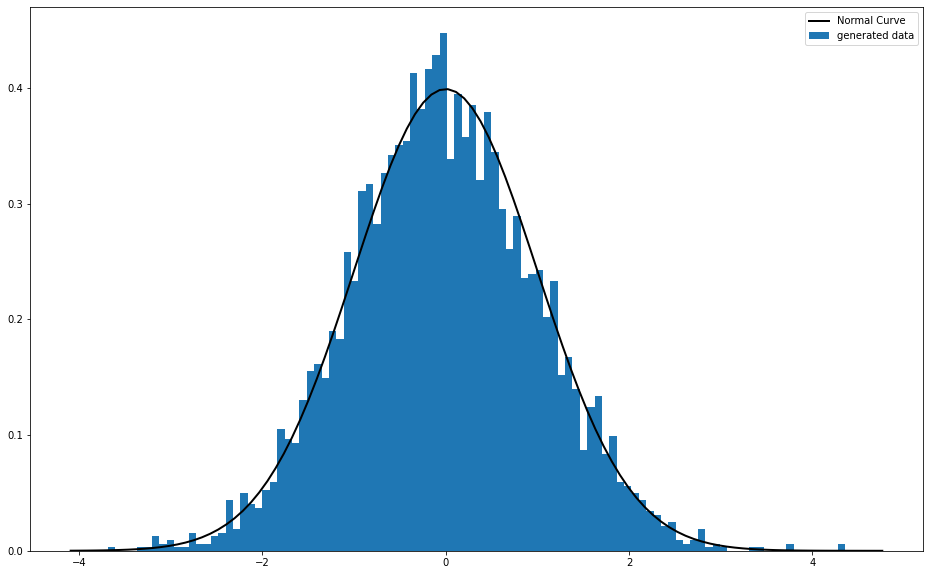

In [11]:
#Original Data
plt.figure(figsize=(16,10))
plt.hist(data,bins=100,density=True,label='generated data')
#Normal data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2,label='Normal Curve')
plt.legend(loc='upper right')
plt.show()

The normal curve fits pretty well, which is consistent with our generated normal distribution. 

Similarly, a QQ plot will show how well the data fits a theoretical normal plot.

C:\Users\thomp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Sample quantiles')

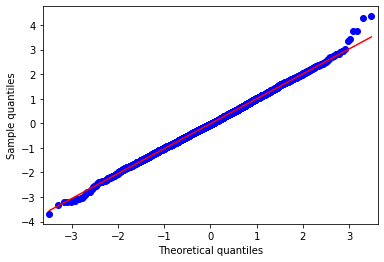

In [12]:
sm.qqplot(data,line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

Aside from visualisation, we can also use a hypothesis test. There are many. However, we will use the [Shapiro Wilk Test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)--which generates a test statistics. Our null hypothesis is that the sample is from a normal distribution. 

Using this and a standard alpha of .05

In [14]:
shapiro(data)

ShapiroResult(statistic=0.9991461634635925, pvalue=0.04788905382156372)

Here our p value was 0.048 and less than .02 and thus we reject the null--this data doesn't appear to be from a normal distribution.

## Real World Data

I like to deal with price series for trading often--so I uploaded a price series of a certain commodity that I eventually want to model! Remember if it's normally distributed this will make my life easier

In [15]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [16]:
stockdata = yf.download("AAPL", start="2019-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [17]:
stockdata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,43.570000,43.787498,43.222500,43.742500,42.772587,103544800
2019-03-04,43.922501,44.437500,43.492500,43.962502,42.987701,109744800
2019-03-05,43.985001,44.000000,43.634998,43.882500,42.909473,78949600
2019-03-06,43.667500,43.872501,43.485001,43.630001,42.662579,83241600
2019-03-07,43.467499,43.610001,43.005001,43.125000,42.168774,99185600


In [19]:
n_df = stockdata[['Open']] # Create a dataframe for network graph purposes 
n_df.head()

,Open
Date,
2019-03-01,43.570000
2019-03-04,43.922501
2019-03-05,43.985001
2019-03-06,43.667500
2019-03-07,43.467499


Let's first run our visual checks

Text(0.5, 1.0, 'Histogram of Price')

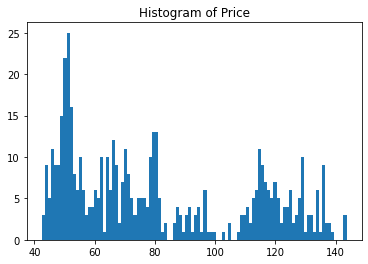

In [20]:
plt.hist(n_df['Open'],bins=100)
plt.title('Histogram of Price')

Eek--that's not so good so far! Does't look normal. Ok let's try the QQ plot


C:\Users\thomp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Sample quantiles')

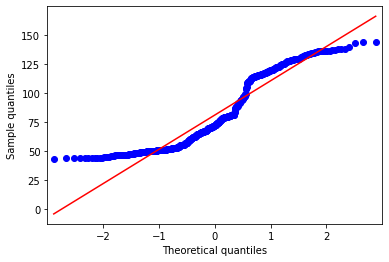

In [21]:
sm.qqplot(n_df['Open'],line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

Here, we see there is some skew and our stock data isn't looking Normal. Just to confirm, we will again try t

In [22]:
shapiro(n_df['Open'])

ShapiroResult(statistic=0.8922966718673706, pvalue=2.693964093709385e-18)

Using a critical value of .05 our P value is much greater than it and therefore we REJECT the Null Hypothesis and say this data isnt normally distributed. 

This is probably the case with most financial data-- many real world datasets aren't normally distributed. However, this blog shows methonds of checking for normal distribution.